In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [59]:
df = pd.read_csv('C:/data_science/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [60]:
df.info()
#No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [61]:
df1 = df.copy()
df1.drop('id', axis=1, inplace=True)
df1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [62]:
df1['date'] = pd.to_datetime(df1['date']) #converting date time by feature enginning
def grade_arr(x):
    if x <= 3:
        return 'low'
    elif x >= 4 and x < 7:
        return 'low_to_avg'
    elif x == 7:
        return 'avg'
    elif x > 7 and x <=10:
        return 'hign_to_avg'
    else:
        return 'high'

df1['grade_range'] = df1['grade'].apply(grade_arr) #converting grade to specific range
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_range
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,avg
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,avg
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,low_to_avg
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,avg
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,hign_to_avg


In [63]:
grade_dummies = pd.get_dummies(df1['grade_range'], dtype= int) #Converting grade into each columns with dummy values
df1 = pd.concat([df1,grade_dummies], axis=1) #concat them together

In [64]:
df1.drop(['grade_range'], axis=1,inplace=True)#Since our column (grade range (Object value)) is already displayed as a dummy value with different
                                            # columns (low, low_to_avg, avg, high_to_avg, high)

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [66]:
df1['day'] = df1['date'].dt.day
df1['month'] = df1['date'].dt.month
df1['hour'] = df1['date'].dt.hour
df1['year'] = df1['date'].dt.year
df1.drop(columns= 'date',inplace=True)

In [83]:
x = df1.drop('price', axis=1)
y = df1['price']
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,sqft_lot15,avg,high,hign_to_avg,low,low_to_avg,day,month,hour,year
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,5650,1,0,0,0,0,13,10,0,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,7639,1,0,0,0,0,9,12,0,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,8062,0,0,0,0,1,25,2,0,2015
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,5000,1,0,0,0,0,9,12,0,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,7503,0,0,1,0,0,18,2,0,2015


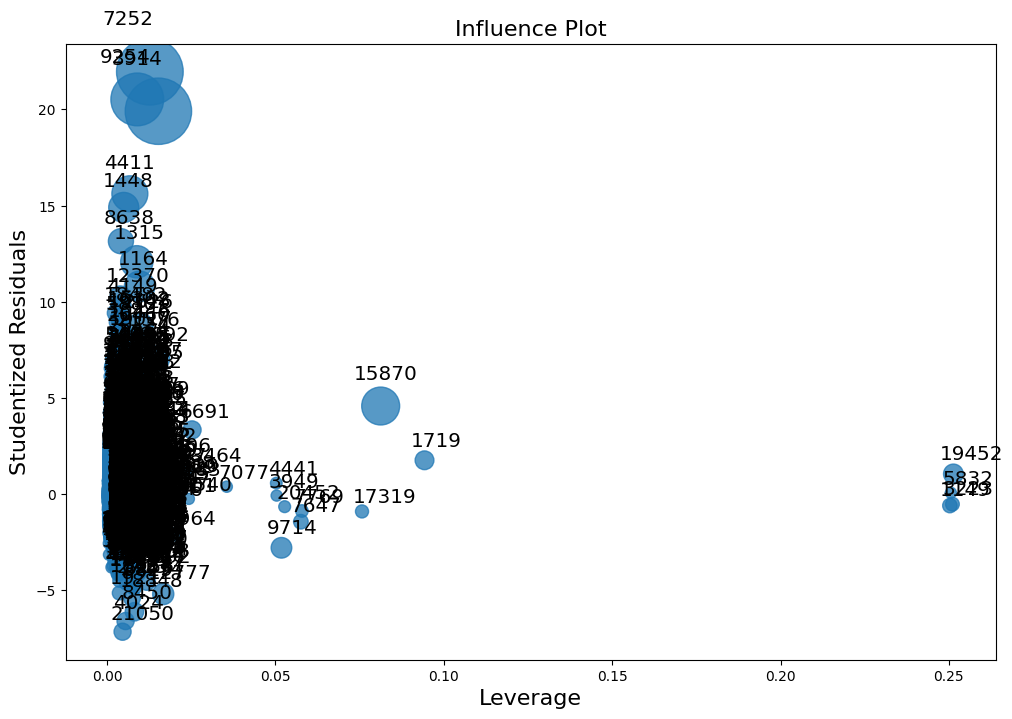

In [90]:
model = sm.OLS(y, x) 
results = model.fit()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [91]:
#There are 7 outliers, with index, 19452,5832, 1149, 3223, 15870, 1719, and 17319
x = x.drop(index=[19452,5832, 1149, 3223, 15870, 1719, 17319])
#So drop them

In [95]:
y = y.drop(index=[19452,5832, 1149, 3223, 15870, 1719, 17319])
#Same for the price

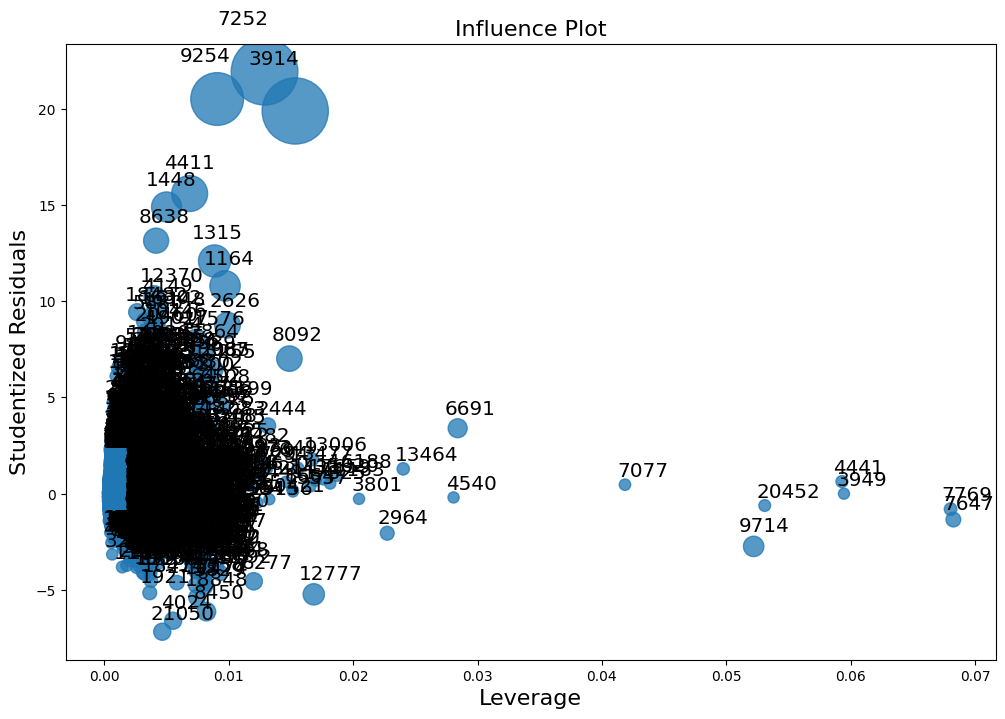

In [96]:
model = sm.OLS(y, x) 
results = model.fit()
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [97]:
#Algthou it looks better, but not enough
x = x.drop(index=[7252,9254,3914,7077,9714,20452,4441,3949,7769,7647])
y = y.drop(index=[7252,9254,3914,7077,9714,20452,4441,3949,7769,7647])

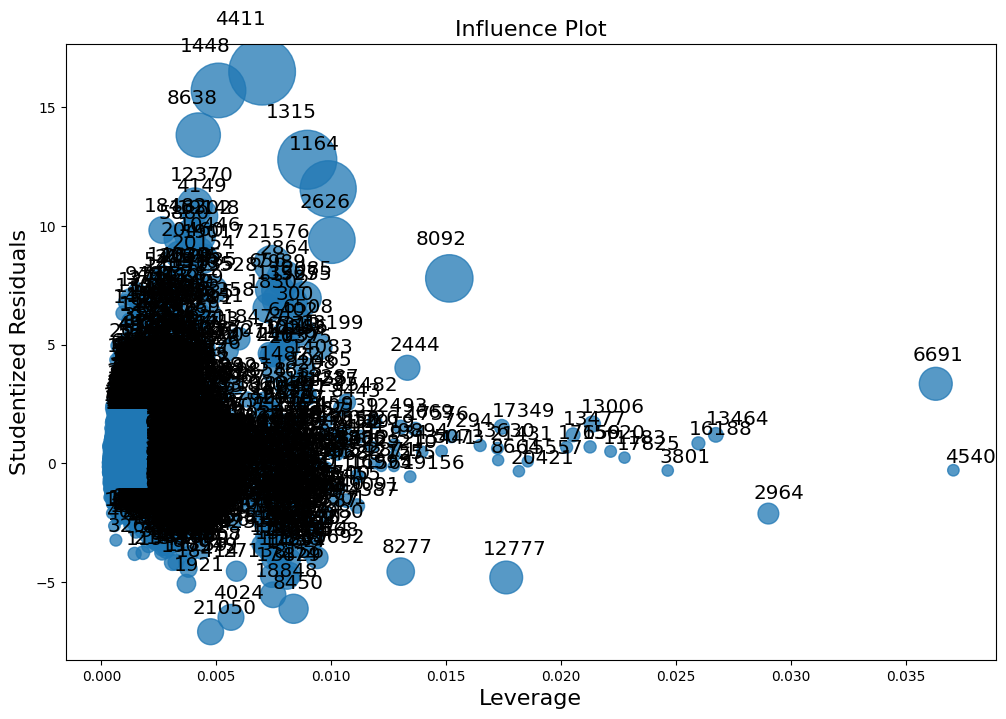

In [98]:
model = sm.OLS(y, x) 
results = model.fit()
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [99]:
#It looks better. And since the max leverage is small enough. So now I gonna do PCA.
# Standardize the features
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

# Perform PCA
pca = PCA(n_components = 0.9)
x_pca = pca.fit_transform(x_std)

# The transformed data is an array, convert it back into a dataframe
x_pca = pd.DataFrame(x_pca)

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('n_components_retained:', pca.n_components_)


Explained variance ratio: [0.24751013 0.08945876 0.07924878 0.07143613 0.06377556 0.05115049
 0.04878108 0.04559102 0.04075223 0.03977556 0.03487589 0.03303193
 0.02880658 0.02284443 0.02134044]
n_components_retained: 15
